In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Imagen filtrada')

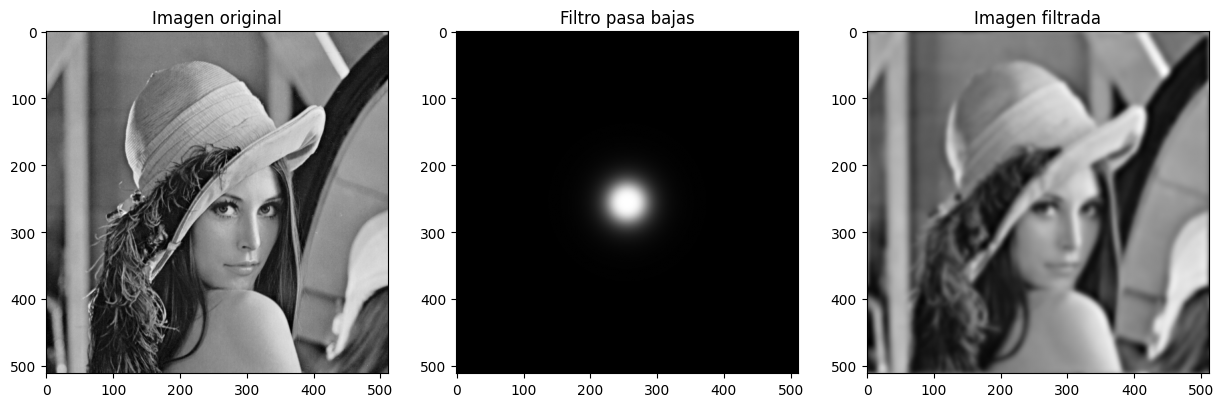

In [2]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
# Desplazar el espectro al centro
dft_shift = np.fft.fftshift(dft)


M, N = img.shape
P, Q = M, N
H = np.zeros((P, Q, 2), np.float32)

# Frecuencia de corte
D0 = 30
# Orden del filtro

n = 2 
for u in range(P) :
    for v in range(Q) :
        # Distancia desde el centro (u-M/2, v-N/2)
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u, v] = 1 / ( 1 + (D/D0)**(2**n))

# Aplicar el filtro: Multiplicación en el dominio de la frecuencia
filtered_dft_shift = dft_shift * H

# Deshace el shit para la IFFT
filtered_dft = np.fft.ifftshift(filtered_dft_shift)
# Calcular la transformada Inversa de Fourier
img_back = cv2.idft(filtered_dft)

# Magnitud del resultado complejo
img_back = cv2.magnitude(img_back[:,:, 0], img_back[:, :, 1])
# Normalizar y convertir a uint8 para visualizacion
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
img_back = np.uint8(img_back)

# Visualizacion 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen original")

plt.subplot(1, 3, 2)
plt.imshow(H[:, :, 0], cmap='gray')
plt.title("Filtro pasa bajas")

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title("Imagen filtrada")

### Filtro pasa alto

C:\Users\Bremdows\AppData\Local\Temp\ipykernel_648\1487919370.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  H[u, v] = 1 / ( 1 + (D0/D)**(2**n))


Text(0.5, 1.0, 'Imagen filtrada')

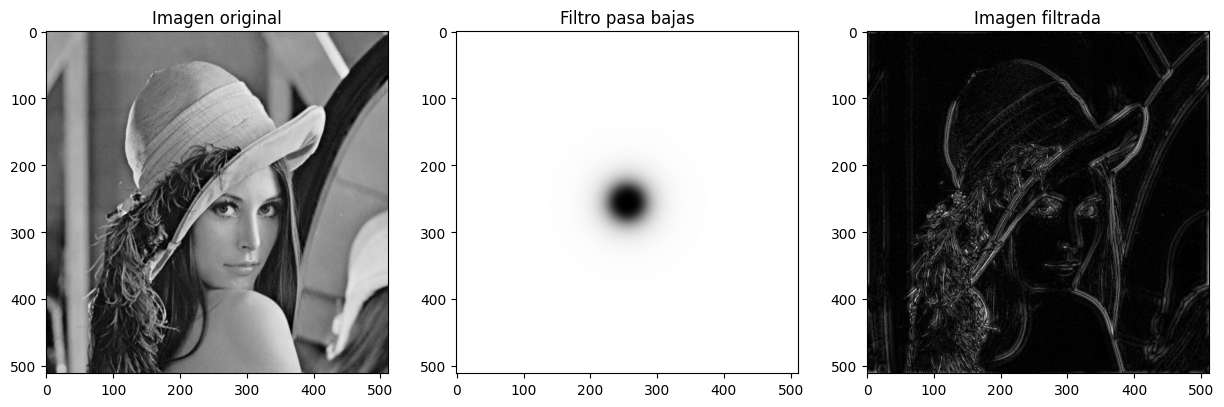

In [3]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
# Desplazar el espectro al centro
dft_shift = np.fft.fftshift(dft)


M, N = img.shape
P, Q = M, N
H = np.zeros((P, Q, 2), np.float32)

# Frecuencia de corte
D0 = 30
# Orden del filtro

n = 2 
for u in range(P) :
    for v in range(Q) :
        # Distancia desde el centro (u-M/2, v-N/2)
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u, v] = 1 / ( 1 + (D0/D)**(2**n))

# Aplicar el filtro: Multiplicación en el dominio de la frecuencia
filtered_dft_shift = dft_shift * H

# Deshace el shit para la IFFT
filtered_dft = np.fft.ifftshift(filtered_dft_shift)
# Calcular la transformada Inversa de Fourier
img_back = cv2.idft(filtered_dft)

# Magnitud del resultado complejo
img_back = cv2.magnitude(img_back[:,:, 0], img_back[:, :, 1])
# Normalizar y convertir a uint8 para visualizacion
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
img_back = np.uint8(img_back)

# Visualizacion 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen original")

plt.subplot(1, 3, 2)
plt.imshow(H[:, :, 0], cmap='gray')
plt.title("Filtro pasa bajas")

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title("Imagen filtrada")